In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

# Spliting Data

Dataset didalamnya sudah terbagi menjadi data train, test, dan validation. 

In [38]:
train = tf.keras.utils.image_dataset_from_directory(
    'Vegetable Images/train',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

test = tf.keras.utils.image_dataset_from_directory(
    'Vegetable Images/test',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

valid = tf.keras.utils.image_dataset_from_directory(
    'Vegetable Images/validation',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [84]:
dict_ = {}

for i,j in enumerate(train.class_names):
    dict_[i] = j
    
dict_

{0: 'Bean',
 1: 'Bitter_Gourd',
 2: 'Bottle_Gourd',
 3: 'Brinjal',
 4: 'Broccoli',
 5: 'Cabbage',
 6: 'Capsicum',
 7: 'Carrot',
 8: 'Cauliflower',
 9: 'Cucumber',
 10: 'Papaya',
 11: 'Potato',
 12: 'Pumpkin',
 13: 'Radish',
 14: 'Tomato'}

# Melihat dataset

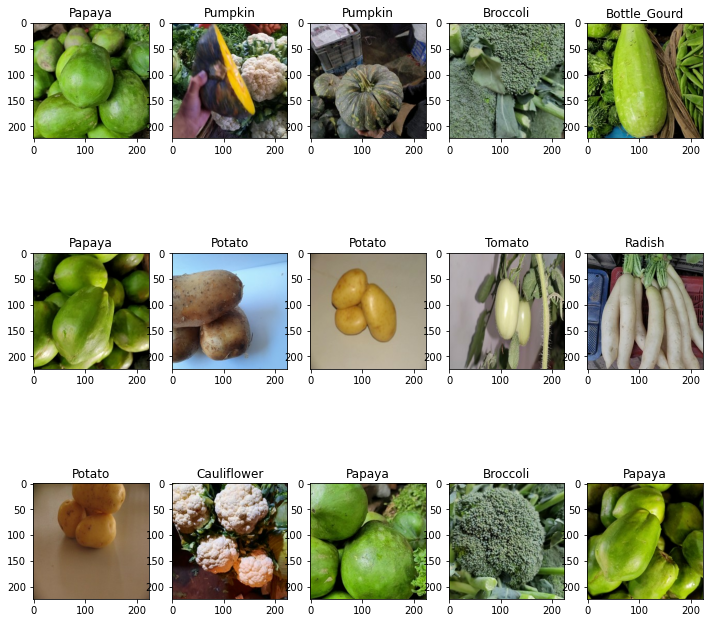

In [50]:
class_names = train.class_names

plt.figure(figsize=(12, 12))
for images, labels in train.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

# Melihat dimensi data

In [40]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


# Modelling

In [41]:
def CNN_classification_model():
    model = Sequential()
    model.add(tf.keras.layers.Rescaling(1./255))

    #2 convolutional layers and 1 maxpooling layer
    model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same'))

    #relu activation function
    model.add(Activation('relu'))

    #Conv2
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same'))
    model.add(Activation('relu'))

    #maxpooling
    model.add(MaxPooling2D(pool_size=(2, 2),strides =1))

    #blok kedua
    model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same'))
    model.add(Activation('relu'))

    #maxpooling
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Flatten.
    model.add(Flatten())

    #fully connected layer
    model.add(Dense(128))
    model.add(Activation('relu'))

    #dropout layer
    model.add(Dropout(0.25))
    model.add(Dense(15))

    #Memetakan tiap kelas ke dalam probabilitas
    model.add(Activation('softmax'))
    tf.random.set_seed(1)
    model.build(input_shape=(32, 224,224,3))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [42]:
model = CNN_classification_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (32, 224, 224, 3)         0         
                                                                 
 conv2d_15 (Conv2D)          (32, 112, 112, 32)        896       
                                                                 
 activation_25 (Activation)  (32, 112, 112, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (32, 56, 56, 64)          18496     
                                                                 
 activation_26 (Activation)  (32, 56, 56, 64)          0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (32, 55, 55, 64)         0         
 g2D)                                                            
                                                      

In [43]:
#train
epochs=8

history = model.fit(train, validation_data=valid, epochs=epochs, shuffle=True)

Epoch 1/8
469/469 [==============================] - 1349s 3s/step - loss: 1.2213 - accuracy: 0.6000 - val_loss: 0.5608 - val_accuracy: 0.8227
Epoch 2/8
469/469 [==============================] - 1318s 3s/step - loss: 0.5268 - accuracy: 0.8297 - val_loss: 0.4934 - val_accuracy: 0.8497
Epoch 3/8
469/469 [==============================] - 1268s 3s/step - loss: 0.3412 - accuracy: 0.8938 - val_loss: 0.2454 - val_accuracy: 0.9300
Epoch 4/8
469/469 [==============================] - 1209s 3s/step - loss: 0.2570 - accuracy: 0.9183 - val_loss: 0.2233 - val_accuracy: 0.9333
Epoch 5/8
469/469 [==============================] - 1165s 2s/step - loss: 0.1903 - accuracy: 0.9395 - val_loss: 0.2002 - val_accuracy: 0.9453
Epoch 6/8
469/469 [==============================] - 1485s 3s/step - loss: 0.1497 - accuracy: 0.9508 - val_loss: 0.1519 - val_accuracy: 0.9577
Epoch 7/8
469/469 [==============================] - 1711s 4s/step - loss: 0.1389 - accuracy: 0.9523 - val_loss: 0.1422 - val_accuracy: 0.9640

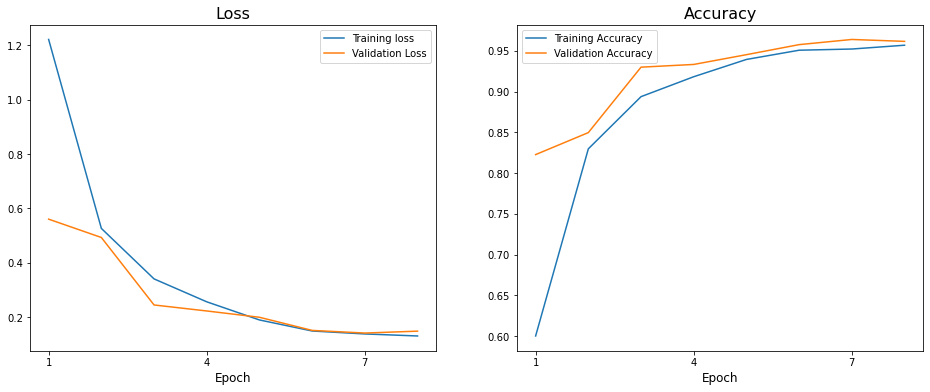

In [44]:
#Grafik Loss dan Akurasi Model

#history = model.fit(train, validation_data=valid, epochs=epochs, shuffle=True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
title_fontsize = 16
axis_fontsize = 12

ax1.plot(range(1,epochs+1), history.history['loss'], label='Training loss')
ax1.plot(range(1,epochs+1), history.history['val_loss'], label='Validation Loss')
ax1.legend()
ax1.set_xticks(range(1,epochs+1,3))
ax1.set_title('Loss', fontsize=title_fontsize)
ax1.set_xlabel('Epoch', fontsize=axis_fontsize)

ax2.plot(range(1,epochs+1), history.history['accuracy'], label='Training Accuracy')
ax2.plot(range(1,epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()
ax2.set_xticks(range(1,epochs+1,3))
ax2.set_title('Accuracy', fontsize=title_fontsize)
ax2.set_xlabel('Epoch', fontsize=axis_fontsize);

In [45]:
#Evaluasi model

model.evaluate(test)

94/94 [==============================] - 133s 1s/step - loss: 0.1527 - accuracy: 0.9600


[0.15266205370426178, 0.9599999785423279]

In [46]:
# save model
model.save('vegetable_model_new.h5')
print('Model Saved!')

Model Saved!


In [143]:
# load model
savedModel=tf.keras.models.load_model('vegetable_model_new.h5')
savedModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 32)      896       
                                                                 
 activation_25 (Activation)  (None, 112, 112, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 activation_26 (Activation)  (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                      

In [134]:
def image_show(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.show()
    return img

In [174]:
def image_pred(img):
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)

    prediction = savedModel.predict(img_preprocessed)
    pred = np.argmax(prediction)
    print(pred)
    return dict_[pred]

In [128]:
dict_

{0: 'Bean',
 1: 'Bitter_Gourd',
 2: 'Bottle_Gourd',
 3: 'Brinjal',
 4: 'Broccoli',
 5: 'Cabbage',
 6: 'Capsicum',
 7: 'Carrot',
 8: 'Cauliflower',
 9: 'Cucumber',
 10: 'Papaya',
 11: 'Potato',
 12: 'Pumpkin',
 13: 'Radish',
 14: 'Tomato'}

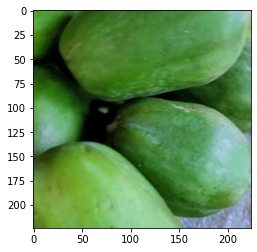

1/1 [==============================] - 0s 125ms/step
12
Pumpkin


In [167]:
img_path = './Vegetable Images/test/Papaya/1202.jpg'
img = image_show(img_path)
print(image_pred(img))